# World population distribution

This dataset contains the `population` for each world `region` from 1800 through 2100 (projected).

The four regions are defined by Gapminder.org. The regions are Africa, Asia, Europe, and the Americas.

This csv also contains global data (`region` is 'world') and other indicators including `life_expectancy`, `child_mortality` rates (per 1000), average number of `babies_per_woman`, and average `income_per_person` (in adjusted USD). See the README for details.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'world-indicators.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

indicators = pd.read_csv('world-indicators.csv')
indicators

,year,region,population,life_expectancy,child_mortality,babies_per_woman,income_per_person
0,1800,africa,81209567,30.091575,443.51,6.58,437.699298
1,1801,africa,81313551,30.016479,443.47,6.58,437.322912
2,1802,africa,81418900,30.019117,443.44,6.58,436.949999
3,1803,africa,81525621,30.099188,443.41,6.58,436.501460
4,1804,africa,81633731,30.101720,443.37,6.58,436.033849
...,...,...,...,...,...,...,...
1500,2096,world,10225850874,83.170480,12.00,1.81,43370.546400
1501,2097,world,10215549310,83.280416,11.00,1.81,43731.659780
1502,2098,world,10204489862,83.393080,11.00,1.80,44094.151440
1503,2099,world,10192689066,83.506378,11.00,1.80,44457.765070


### Project Ideas

#### Horizontal Bar plot

- In the `year` 2000, there were roughly 6 billion people on earth. If you had blocks that each represented 1 billion people, how many blocks would you predict belong in each `region` (africa, asia, europe, americas)?

- In the `year` 2100, the UN projects 11 billion people. Again, predict how many blocks would now go to each `region`.

- Test your predictions. First create a new column named `pop_billions` (`population` divided by 1e9 that is rounded to the nearest would number).

- Then filter on the years 2000 and 2100 to create your horizontal bar plots. 

- Follow the Pro Tips for horizontal bar plots.

Challenge: Place your plots side by side by using `plt.subplots(1,2)`.

#### Line Plot

- Create a line plot with year on the x-axis and population on y-axis for each `region`.

- We pivoted the dataframe for you in the variable `df_pivot`.

- Follow the Pro Tips for line plots.



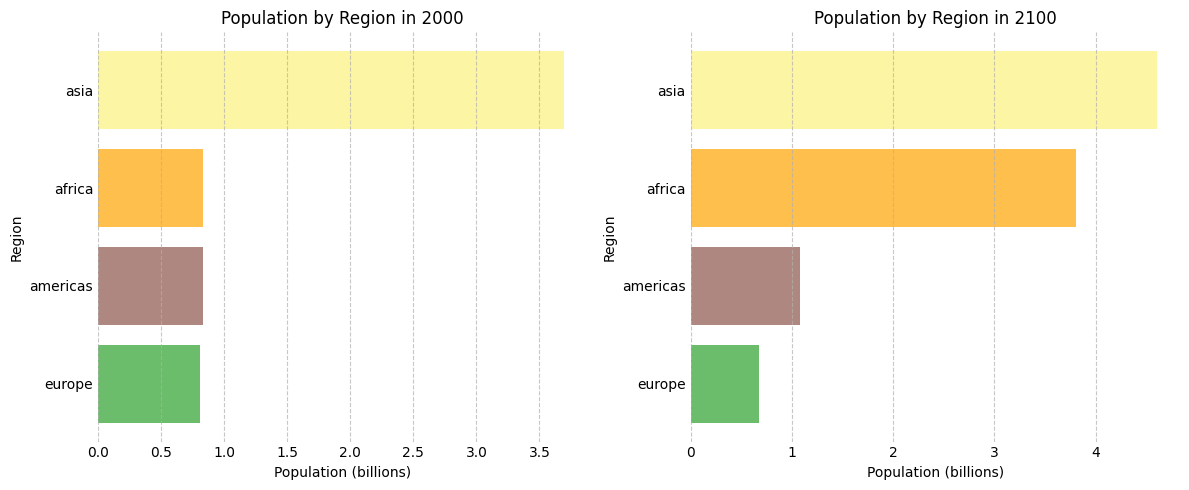

In [79]:
# quick data cleaning
df = indicators[['year', 'region', 'population']]   # select columns of interest
df = df.query('region != "world"') # only include 4 regions
df_2000 = df.query('year == 2000').copy()  # only include year 2000
df_2100 = df.query('year == 2100').copy()

# Add a new column for population in billions
df_2000['pop_billions'] = df_2000['population'] / 1e9
df_2100['pop_billions'] = df_2100['population'] / 1e9

df_2000.sort_values('pop_billions', inplace=True)
df_2100.sort_values('pop_billions', inplace=True)

def format_barh(ax, data):
    color_map = {
    'africa': "orange",
    'americas': '#8c564b',
    'asia': '#fbf27c',
    'europe': "#2ca02c"
    }

    colors = [color_map[region] for region in data['region']]

    ax.barh(data['region'], data['pop_billions'], color=colors, alpha=0.7)
    ax.set_xlabel('Population (billions)')
    ax.set_ylabel('Region')
    ax.set_title(f'Population by Region in {data["year"].iloc[0]}')

def clean_bar_axes(ax):
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.grid(axis='x', linestyle='--', alpha=0.7)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for the year 2000
format_barh(ax[0], df_2000)
clean_bar_axes(ax[0])

# Bar plot for the year 2100
format_barh(ax[1], df_2100)
clean_bar_axes(ax[1])

plt.tight_layout()
plt.show()

In [133]:
# Pivot the DataFrame for the line plot
df_pivot = df.pivot(index='year', columns='region', values='population').reset_index()
df_pivot.columns.name = None  # remove index name
df_pivot[['africa', 'americas', 'asia', 'europe']] /= 1e9  # convert to billions
df_pivot

,year,africa,americas,asia,europe
0,1800,0.081210,0.023557,0.672522,0.206911
1,1801,0.081314,0.023817,0.674655,0.207843
2,1802,0.081419,0.024087,0.676807,0.208785
3,1803,0.081526,0.024367,0.678980,0.209738
4,1804,0.081634,0.024657,0.681172,0.210701
...,...,...,...,...,...
296,2096,3.751829,1.097157,4.686524,0.681700
297,2097,3.767449,1.094294,4.665880,0.679322
298,2098,3.782475,1.091412,4.645089,0.676947
299,2099,3.796919,1.088500,4.624187,0.674553


In [149]:
def add_end_labels(df, x, column_names, alpha=1, fontweight='normal'):
    for column_name in column_names:
        y = df[column_name].iloc[-1]
        label = f'  {column_name}'
        plt.text(x, y, label, va="center", alpha=alpha, fontweight=fontweight)

<Figure size 1000x600 with 0 Axes>

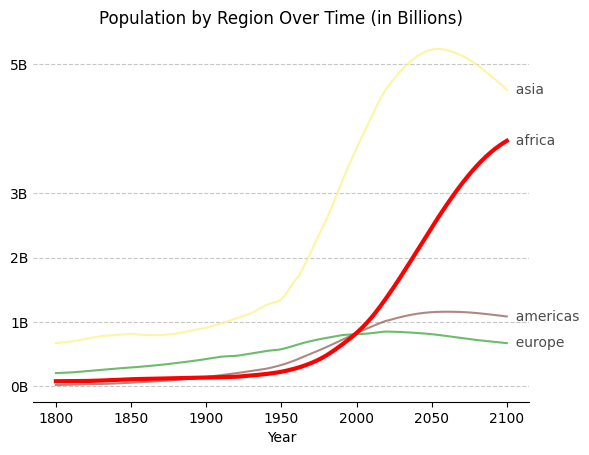

In [150]:
# YOUR CODE HERE (add more cells as needed)

focus_column = 'africa'
focus_color = 'red'
back_columns = ['americas', 'asia', 'europe']
back_colors = ['#8c564b', '#fbf27c', '#2ca02c']


def format_line():
    plt.xlabel('Year')
    plt.title('Population by Region Over Time (in Billions)')

def clean_line_axes():
    ax = plt.gca()
    ax.spines[['top', 'right', 'left']].set_visible(False)
    ax.tick_params(axis='y', length=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

def add_axis_labels():
    y_ticks = [0, 1, 2, 3, 5]
    y_tick_labels = ['0B', '1B', '2B', '3B', '5B']
    plt.yticks(y_ticks, y_tick_labels)


def create_line_plot(dframe):
    plt.figure(figsize=(10, 6))
    dframe.plot(x='year', y=back_columns, color=back_colors, alpha=0.7)
    plt.plot(dframe['year'], dframe[focus_column], color=focus_color, linewidth=3)
    plt.legend().set_visible(False)  # hide legend

    format_line()
    clean_line_axes()
    add_axis_labels()
    add_end_labels(dframe, dframe['year'].iloc[-1], ['americas', 'asia', 'europe'], alpha=0.7)
    add_end_labels(dframe, dframe['year'].iloc[-1], [focus_column], alpha=0.7)


create_line_plot(df_pivot)



